In [39]:

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FuncFormatter
import matplotlib
%matplotlib inline

Mean context lengths: 137.90535875634222
Max context lengths: 766
Min context lengths: 22
Median context lengths: 127.0


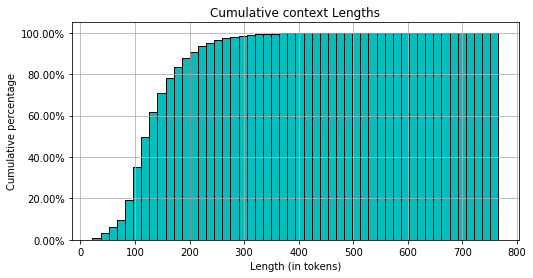

In [67]:
context = open("train.context", "r")
context_lens = [len(example.split()) for example in context]


def to_percent(y, position):
    # Ignore the passed in position. This has the effect of scaling the default
    # tick locations.
    s = '%3.2f'%(100 * y)

    # The percent symbol needs escaping in latex
    if matplotlib.rcParams['text.usetex'] is True:
        return s + r'$\%$'
    else:
        return s + '%'
plt.figure(figsize=(8,4))
plt.hist(context_lens, bins=50, cumulative=True, normed=True,facecolor='c',edgecolor='k')
formatter = FuncFormatter(to_percent)
plt.gca().yaxis.set_major_formatter(formatter)
#plt.yscale('log', nonposy='clip') #comment out to remove log scale
plt.grid(which='both')
plt.title("Cumulative context Lengths")
plt.xlabel("Length (in tokens)")
plt.ylabel("Cumulative percentage")
filename = "context_lengths_cumulative.png"
plt.savefig(filename,dpi=300, bbox_inches='tight')
print('Mean context lengths:', np.mean(context_lens))
print('Max context lengths:', np.max(context_lens))
print('Min context lengths:', np.min(context_lens))
print('Median context lengths:', np.median(context_lens))

Mean answer lengths: 3.382851052985196
Max answer lengths: 46
Min answer lengths: 1
Median answer lengths: 2.0


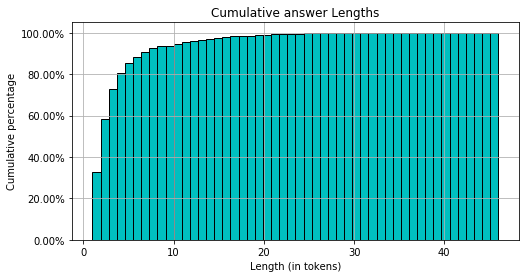

In [66]:
answer = open("train.answer", "r")
answer_lens = [len(example.split()) for example in answer]


def to_percent(y, position):
    # Ignore the passed in position. This has the effect of scaling the default
    # tick locations.
    s = '%3.2f'%(100 * y)

    # The percent symbol needs escaping in latex
    if matplotlib.rcParams['text.usetex'] is True:
        return s + r'$\%$'
    else:
        return s + '%'
plt.figure(figsize=(8,4))
plt.hist(answer_lens, bins=50, cumulative=True, normed=True,facecolor='c',edgecolor='k')
formatter = FuncFormatter(to_percent)
plt.gca().yaxis.set_major_formatter(formatter)
#plt.yscale('log', nonposy='clip') #comment out to remove log scale
plt.grid(which='both')
plt.title("Cumulative answer Lengths")
plt.xlabel("Length (in tokens)")
plt.ylabel("Cumulative percentage")
filename = "answer_lengths_cumulative.png"
plt.savefig(filename,dpi=300, bbox_inches='tight')
print('Mean answer lengths:', np.mean(answer_lens))
print('Max answer lengths:', np.max(answer_lens))
print('Min answer lengths:', np.min(answer_lens))
print('Median answer lengths:', np.median(answer_lens))

Mean question lengths: 11.290237008548988
Max question lengths: 60
Min question lengths: 1
Median question lengths: 11.0


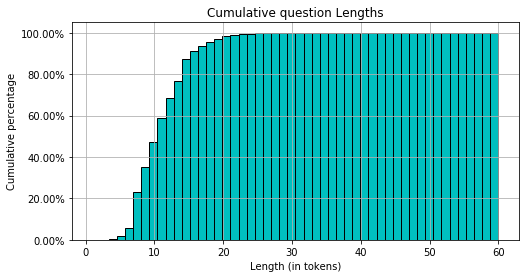

In [65]:
question = open("train.question", "r")
question_lens = [len(example.split()) for example in question]
plt.figure(figsize=(8,4))
plt.hist(question_lens, bins=50, cumulative=True, normed=True,facecolor='c',edgecolor='k')
formatter = FuncFormatter(to_percent)
plt.gca().yaxis.set_major_formatter(formatter)
#plt.yscale('log', nonposy='clip') #comment out to remove log scale
plt.grid(which='both')
plt.title("Cumulative question Lengths")
plt.xlabel("Length (in tokens)")
plt.ylabel("Cumulative percentage")
filename = "question_lengths_cumulative.png"
plt.savefig(filename,dpi=300, bbox_inches='tight')
print('Mean question lengths:', np.mean(question_lens))
print('Max question lengths:', np.max(question_lens))
print('Min question lengths:', np.min(question_lens))
print('Median question lengths:', np.median(question_lens))

Text(0,0.5,u'Frequency')

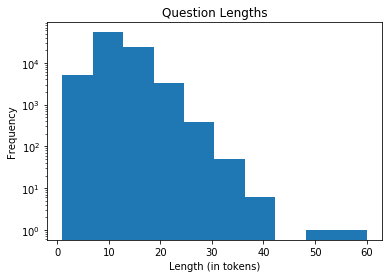

In [12]:

plt.hist(question_lens)
plt.yscale('log', nonposy='clip') #comment out to remove log scale
plt.title("Question Lengths")
plt.xlabel("Length (in tokens)")
plt.ylabel("Frequency")

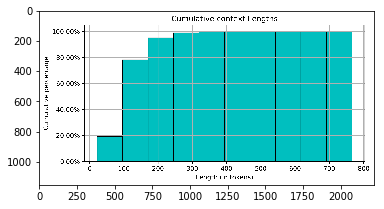

In [58]:
plt.imshow(plt.imread(filename))

Text(0,0.5,u'Frequency')

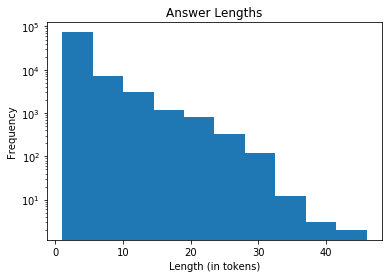

In [10]:
answer = open("train.answer", "r")
answer_lens = [len(example.split()) for example in answer]

plt.hist(answer_lens)
plt.yscale('log', nonposy='clip') #comment out to remove log scale
plt.title("Answer Lengths")
plt.xlabel("Length (in tokens)")
plt.ylabel("Frequency")

Text(0,0.5,u'Frequency')

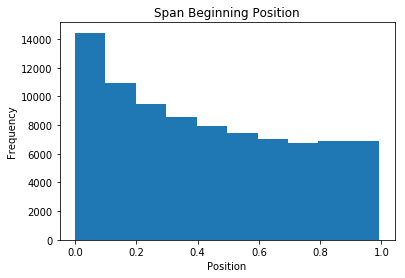

In [18]:
span = open("train.span", "r")
span_ends = [map(int, example.split()) for example in span]

#where the answer is in the context as a ratio
#ex. for a context i of length n with an answer span [j, k],
#beginnings[i] = j/n
#ends[i] = k/n

beginnings = [float(span_ends[_][0])/float(context_lens[_]) for _ in range(len(span_ends))]
plt.hist(beginnings)
# plt.yscale('log', nonposy='clip') #comment out to remove log scale
plt.title("Span Beginning Position")
plt.xlabel("Position")
plt.ylabel("Frequency")

Text(0,0.5,u'Frequency')

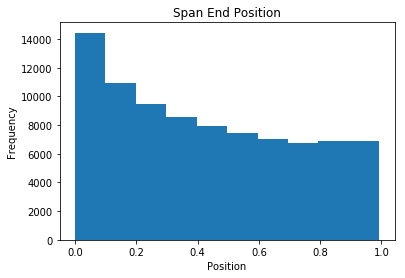

In [19]:
ends = [float(span_ends[_][1])/float(context_lens[_]) for _ in range(len(span_ends))]
plt.hist(beginnings)
# plt.yscale('log', nonposy='clip') #comment out to remove log scale
plt.title("Span End Position")
plt.xlabel("Position")
plt.ylabel("Frequency")